# Characterizing data distribution

#### We want to represent the dataset in a human-friendly format to get a good impression of it. This is a kind of dataset "identity card".

- Data format : autoML

In [23]:
data_dir = '../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares'),
            'adult': (data_dir + '/adult', 'adult')}

input_dir, basename = datasets['chems']

## Characterization

### Visualization
- Scatter plot matrix
- Classes distribution
- Hierarchical clustering with heatmap matrix
- Hierarchical clustering with correlation matrix
- Principal components analysis (PCA)
- Linear discriminant analysis (LDA)
- T-distributed stochastic neighbor embedding (t-SNE algorithm)

### Meta features

- **Simple features, Simple Measurements or General Data Characteristic** are directly and easily accessible properties of the dataset wich need almost no computations such as number of classes or number of attributes.
    
    - Number of records: $n$
    - Number of attributes: $m$
    -  Number of classes: $q$
    -  Ratio of symbolic attributes: $\frac{m_{symb}}{m}$
    -  DatasetRatio $=\frac{NumberOfFeatures}{NumberOfInstances}$  
    -  Default error rate: $1 - Acc_{def}$ where $Acc_{def}$ is the probability of the largest class or default accuracy.
    -  Standard deviation of the class distribution: $\sigma_{class}$
    -  Relative probability of defective records: $\frac{n_{defTuple}}{n}$ where $n_{defTuple}$ is the number of records with missing values.
    -  Relative probability of missing values: $\frac{h_{missVal}}{n \times m}$ where $h_{missVal}$ is the number of missing values.

<br>   
- **Statistical features** use statistical analysis methods and tests (Engels and Theusinger, 1998; Sohn 1999).
    
    - Kurtosis: Fourth central moment divided by the square of the variance $\frac{E[(x_i-E[x_i])^4]}{[E[(x_i-E[x_i])^4]]^2}$ where $x_i$ is the ith feature. 
    - PCAKurtosis: Transform the dataset X by PCA, then compute the kurtosis
    - SkewnessMin: min over skewness of all features. Skewness measures the symmetry of a distribution. A skewness value > 0 means that there is more weight in the left tail of the distribution

<br> 
- **Discriminant Measurements** compute a discriminant analysis leading to the following measurements:
    
    -  Relative importance if the largest eigenvalue as an indication for the importance of the $1{\text{st}}$ discriminant function
    -  Canonical correlation, which is an indicator for the degree of correlation between the most significant discriminant function and class distribution. There is a strong correlation between the classes and the $1{\text{st}}$ discriminant function if this measurement is close to unity.
    -  Number of discriminant functions
    -  Wilks Lambda describes the significance of the r discriminant functions and is defined as follows:
        
        $$ \Lambda = \Pi^{DiscFct}_{j=1} \frac{1}{1 + \lambda_j} $$
        
        If Wlambda is near zero, in principle this indicates there is a good possibility for making good discriminations.

<br> 
-  **Information-theoric features** typically use entropy measures of the attributes and the class label (Segrera et al., 2008).
    
    -  ClassEntropy $= mean(-\sum_{i=1}^{n}p(Class_i)ln(p(Class_i)))$ where $p(Class_i)$ is the probability of having an instance of Class\_i
    -  Join entropy
    -  Average attribute entropy
    -  Average mutual information
    -  Relevance-measure
    -  Signal Noise Ratio

<br> 
-  **Model-based features** create a model of the data, e.g. a decision tree, and use properties of it, e.g. the width and height of the tree, as features (Peng et al., 2002 used 17 properties of a decision tree).

<br> 
-  **Landmarking features** apply fast computable classifiers, e.g. Naive Bayes or 1-Nearest Neighbor, on the dataset (Pfahringer et al., 2000; Bensusan and Giraud-Carrier, 2000) and use the resulting performance as meta-features. This can be done with several metrics.
    
    <!-- -  Landmark[Some\_Model]: accuracy of [Some\_Model] applied on dataset. -->
    <!-- -  LandmarkDecisionNodeLearner \& LandmarkRandomNodeLearner: Both are decision tree with max\_depth=1. `DecisionNode' considers all features when looking for best split, and `RandomNode' considers only 1 feature, where comes the term `random'. -->

<br> 
-  **Time-based features** are specialized for time predictions. They contain time measures of several computations regarding the dataset, e.g. the time for computing the other meta-features. Meta-features of this group have the benefit that they are able to take the performance of the computer into account. In (Reif et al., 2011) they present nine different time-measures.
    
    -  Training time ?
    -  Testing time ?

<!-- 
A voir : Algorithm Characteristics

ClassProbabilityMin $= min_{i=1 \dots n}(p(Class_i))= min_{i=1 \dots n}(\frac{NumberOfInstances\_Class_i}{TotleNumberOfInstances}) $

NumSymbols: For each categorial feature, compute how many unique values there is ???

Interpretability of the model ? -->

In [24]:
# AutoML
import sys
main_path = '../../'
sys.path.append(main_path + 'code/auto_ml')
sys.path.append(main_path + 'code/processing')
sys.path.append(main_path + 'code/functions')
sys.path.append(main_path + 'code/models')
sys.path.append(main_path + 'data')

%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read data

In [28]:
#D = AutoML(input_dir, basename)
D = AutoML.from_csv(input_dir, basename, 'chemsdata.csv', target=-1, seps=[',', ','])

In [29]:
D.show_info()

Metric: Auc metric
Test num: 211
Has missing: 0
Format: Dense
Feat type: Mixed
Feat num: 42
Task: Unknown
Target num: 1
Time budget: 600
Name: Chems
Usage: No info file
Train num: 844
Has categorical: 0
Is sparse: 0


In [35]:
D.process_data()
data = D.get_data('X', processed=True)
data.head()

,IDNUM,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,Cpercent,nCp,...,nCrt,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX
862,0.0,-1.955577,-0.691902,-0.499618,-0.167699,-0.412415,-0.260737,-0.749298,-0.436038,-0.185556,...,-0.205951,-0.590590,-0.558698,-0.758316,-0.900359,-1.000261,-0.629986,-1.394534,-0.172839,-0.328996
949,0.0,1.176333,-0.799350,-0.499618,-0.167699,-0.412415,1.661204,0.133953,0.608937,1.325144,...,-0.205951,-0.590590,-0.558698,-0.758316,-0.241051,-0.802655,-0.629986,0.123644,-0.172839,-0.328996
675,0.0,2.222150,-1.689340,7.741641,-0.167699,-0.412415,5.505088,-0.749298,0.608937,-0.689123,...,12.790137,-0.590590,-0.558698,-0.758316,0.421039,-0.088112,-0.629986,1.330004,-0.172839,5.160419
555,0.0,0.030737,0.187913,-0.499618,-0.167699,0.425319,-0.260737,0.575578,0.293267,0.318011,...,-0.205951,0.060989,0.305722,0.835753,-0.239196,-0.693576,0.304475,-0.453681,-0.172839,-0.328996
412,0.0,0.575819,0.201481,-0.499618,-0.167699,-0.412415,-0.260737,0.575578,0.151760,1.325144,...,-0.205951,0.060989,-0.558698,0.038718,-0.182631,-0.666702,-0.629986,-0.261496,-0.172839,-0.328996


In [36]:
D.show_feat_type()

,IDNUM,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,Cpercent,nCp,...,nCrt,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX
Type,Categorical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,...,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical


In [37]:
data.describe()

,IDNUM,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,Cpercent,nCp,...,nCrt,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX
count,1055.00000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,337.20000,-0.014267,0.012032,-0.007486,0.004791,-0.001886,0.017990,-0.022186,-0.027231,0.003938,...,0.005004,-0.014977,-0.007681,0.007744,-0.040533,0.013722,0.011293,-0.044234,-0.023506,0.001843
std,275.65737,1.010555,1.007018,1.004371,1.035293,0.977198,1.031863,0.982537,0.995389,0.988764,...,1.046278,0.990705,0.982843,1.001883,0.926928,1.016114,1.018925,0.958595,0.930600,1.024364
min,0.00000,-5.155854,-2.732447,-0.499618,-0.167699,-0.412415,-0.260737,-0.749298,-4.060794,-0.689123,...,-0.205951,-0.590590,-0.558698,-0.758316,-1.571721,-1.711643,-0.629986,-2.909624,-0.172839,-0.328996
25%,52.50000,-0.571624,-0.674519,-0.499618,-0.167699,-0.412415,-0.260737,-0.749298,-0.746265,-0.689123,...,-0.205951,-0.590590,-0.558698,-0.758316,-0.439956,-0.706223,-0.629986,-0.537038,-0.172839,-0.328996
50%,316.00000,0.069540,-0.016081,-0.499618,-0.167699,-0.412415,-0.260737,-0.307672,0.021138,-0.185556,...,-0.205951,-0.590590,-0.558698,0.038718,-0.218796,-0.145022,-0.629986,-0.144951,-0.172839,-0.328996
75%,579.50000,0.618317,0.457987,0.187153,-0.167699,0.006452,-0.260737,0.575578,0.663362,0.318011,...,-0.205951,0.060989,0.305722,0.835753,0.023229,0.507078,0.304475,0.257555,-0.172839,-0.328996
max,843.00000,3.151561,7.411045,7.741641,11.964141,14.666797,12.231885,7.199955,2.546494,11.396479,...,12.790137,7.228362,7.221083,4.820924,6.243533,5.177693,6.845696,4.641129,11.497220,12.022188


## Preprocessing

### Missing values

For numerical variables:
    - Replace missing values by : 'median', 'mean' or 'remove'
    - Replace +inf and -inf by respectively the maximum and the minimum

For categorical variables:
    - Replace missing values by 'missing'
    
For binary variables:
    - Replace missing values by 'missing'

### Normalization

For numerical variables:
    - Normalization : 'mean' or 'min-max'

For categorical variables:
    - None
    
For binary variables:
    - None

### Encoding 

For numerical variables:
    - None

For categorical variables:
    - Encoding : label, one-hot or likelihood
   
For binary variables:
    - Label encoding

In [42]:
processed_data = D.process_data(norm='min-max', code='likelihood', missing=['remove', 'remove', 'median'])
#processed_data = D.get_data(processed=True)
processed_data.head()

,IDNUM,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,Cpercent,nCp,...,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX,class
0,1.090591,0.426824,0.225351,0.0,0.0,0.0,0.0,0.0,0.517298,0.083333,...,0.0,0.0,0.000000,0.080921,0.028453,0.0,0.238782,0.0,0.0,1
1,2.092289,0.482651,0.156504,0.0,0.0,0.0,0.0,0.0,0.507414,0.041667,...,0.0,0.0,0.000000,0.124347,0.114732,0.0,0.239190,0.0,0.0,1
2,3.078930,0.429715,0.292264,0.0,0.0,0.0,0.0,0.0,0.439868,0.083333,...,0.0,0.0,0.142857,0.095990,0.217990,0.0,0.274353,0.0,0.0,1
3,4.071967,0.222420,0.227608,0.0,0.0,0.0,0.0,0.0,0.329489,0.000000,...,0.0,0.0,0.142857,0.092430,0.810693,0.0,0.181233,0.0,0.0,1
4,5.101691,0.497331,0.309365,0.0,0.0,0.0,0.0,0.0,0.484349,0.083333,...,0.0,0.0,0.000000,0.128619,0.215236,0.0,0.315445,0.0,0.0,1


In [39]:
D.data

,IDNUM,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,Cpercent,nCp,...,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX,class
0,1.0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,1
1,2.0,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,1
2,3.0,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,...,0.0,0.0,1.0,3.076,2.417,0.0,7.601,0.0,0.0,1
3,4.0,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,1.0,3.046,5.000,0.0,6.690,0.0,0.0,1
4,5.0,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,0.0,1
5,6.0,4.236,3.4286,0.0,0.0,0.0,0.0,0.0,28.6,2.0,...,0.0,0.0,0.0,3.351,2.556,0.0,7.904,0.0,0.0,1
6,7.0,5.000,5.0476,1.0,0.0,0.0,0.0,0.0,11.1,0.0,...,0.0,0.0,1.0,4.712,4.583,0.0,9.303,0.0,0.0,1
7,8.0,4.525,3.8301,0.0,0.0,0.0,0.0,0.0,31.6,3.0,...,0.0,0.0,0.0,3.379,2.143,0.0,7.950,0.0,0.0,1
8,9.0,4.596,3.0777,0.0,0.0,0.0,0.0,2.0,44.4,2.0,...,0.0,0.0,0.0,3.626,1.917,0.0,7.939,0.0,0.0,1
9,10.0,5.040,3.6112,0.0,0.0,1.0,0.0,2.0,41.2,0.0,...,1.0,2.0,1.0,3.888,3.500,1.0,8.706,0.0,0.0,1


# Visualization

In [43]:
D.subsets

{'X': array(['IDNUM', 'SpMaxL', 'JDze', 'nHM', 'F01NN', 'F04CN', 'NssssC',
        'nCb', 'Cpercent', 'nCp', 'nO', 'F03CN', 'SdssC', 'HyWiBm', 'LOC',
        'SM6L', 'F03CO', 'Me', 'Mi', 'nNN', 'nArNO2', 'nCRX3', 'SpPosABp',
        'nCIR', 'B01CBr', 'B03CCl', 'N073', 'SpMaxA', 'Psii1d', 'B04CBr',
        'SdO', 'TI2L', 'nCrt', 'C026', 'F02CN', 'nHDon', 'SpMaxBm',
        'PsiiA', 'nN', 'SM6Bm', 'nArCOOR', 'nX'], dtype=object),
 'test': array([ 862,  949,  675,  555,  412,  782,   96,   42,  816,  327,  125,
         654,  916,  610,  339,  303, 1044,  900,  684,  798,   50,  232,
         721,  395,  714,  608,   78,  143,   13,   28, 1015,  140,  729,
         677,  730,  112,  894,  302,  984,  546,  476,  981,  822,  973,
         937,  968,  700,  419,  820,  693, 1032,  353,  999,  425,  651,
         774,  287,   79,  174,  746, 1011,  105,  493,   71,  581,  563,
         787,  578,   98,  834,  858,  852,  888,  665,   74,  920,  183,
         924,   37,   76,  742,   33,   90

** Descriptors **

Skewness max: 26.845983240149426
Class deviation: 0.9461217954326834
Ratio: 0.04976303317535545
Skewness min: -1.7621976606261545
Symb ratio: 0.9047619047619048
Skewness mean: 3.687796697271126
Missing proba: 0.0



** Plots **

** Scatter plot matrix **

Too much features to pairplot. Number of features: 42, max features to plot set at: 20


** Correlation matrix **

Correlation matrix of X set


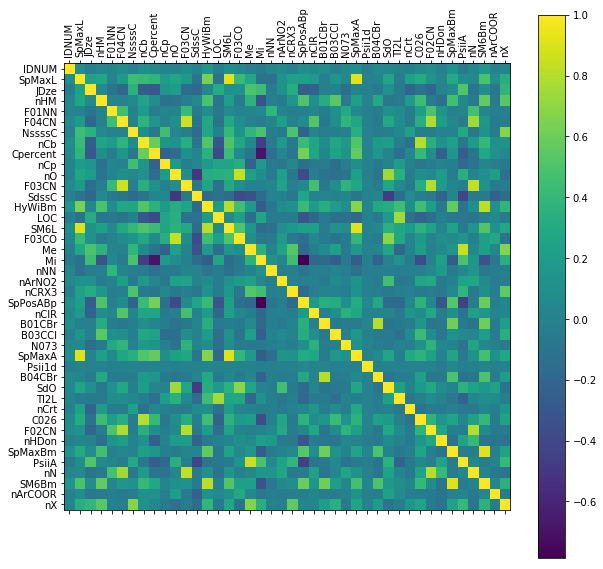

** Hierarchical clustering heatmap **

Hierarchical clustering heatmap of X set

Performing hierarchical clustering using euclidean for columns and euclidean for rows
Column clustering completed in 0.1 seconds


../../code/functions/utilities.py:195: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y2 = sch.linkage(D2, method=column_method, metric=column_metric)
../../code/functions/utilities.py:215: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y1 = sch.linkage(D1, method=row_method, metric=row_metric)


Row clustering completed in 2.3 seconds


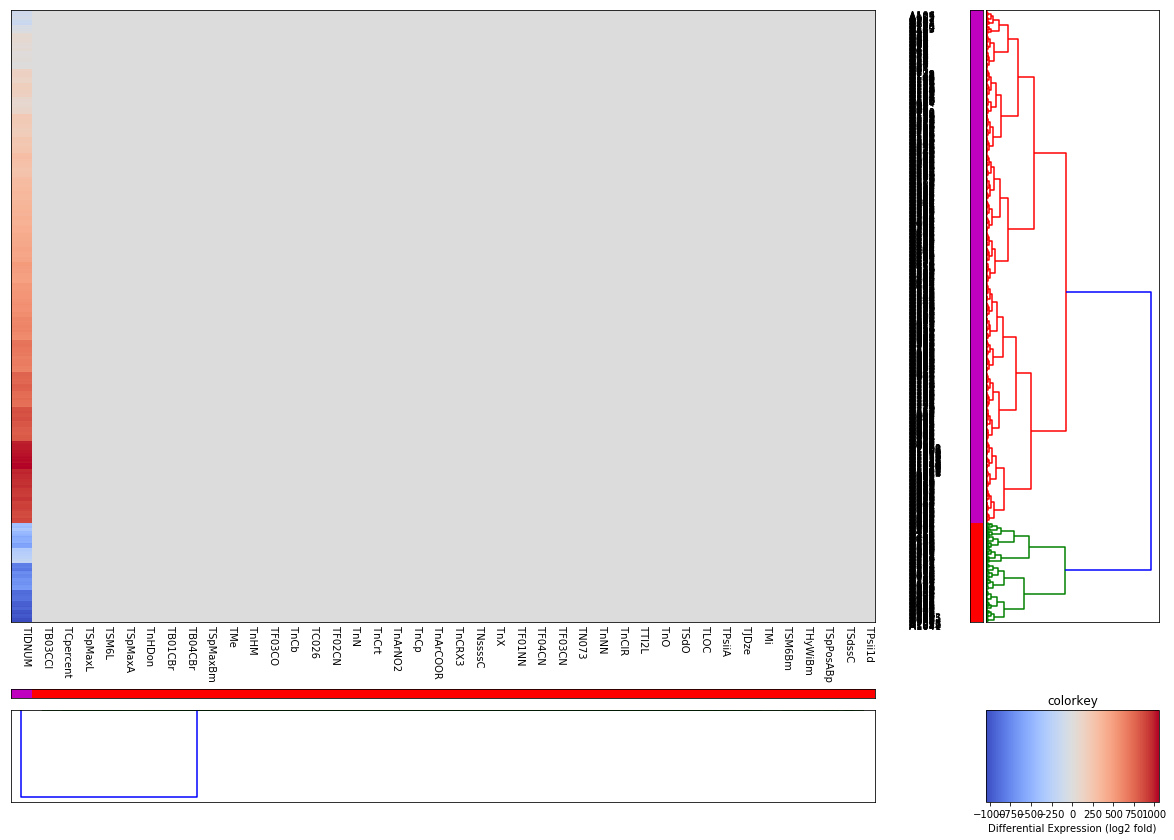

** Classes distribution **

Classes distribution of y_train set


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


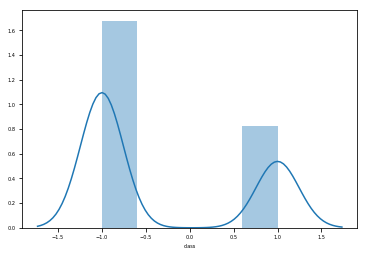

** Principal components analysis **

Could not show PCA because X has 1055 rows and Y has 844 rows


** t-distributed stochastic neighbor embedding **

Could not show t-SNE because X has 1055 rows and Y has 844 rows


** Linear discriminant analysis **

Could not show LDA because X has 1055 rows and Y has 844 rows


In [44]:
D.show_characteristics(sets=['X', 'y_train'], processed=True)

Principal components analysis of X and y sets
Explained variance ratio of the 4 components: 
 [0.81530787 0.14899872 0.02846365 0.00722976]
['setosa' 'versicolor' 'virginica']


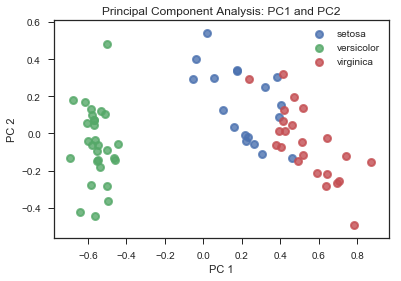

Principal components analysis of X_train and y_train sets
Explained variance ratio of the 4 components: 
 [0.83152125 0.13113712 0.02970372 0.00763792]
['setosa' 'versicolor' 'virginica']


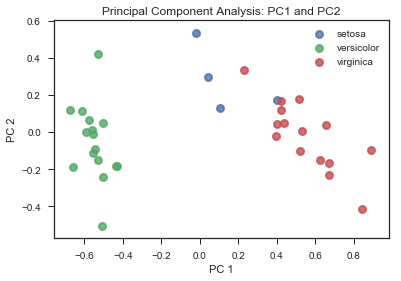

In [181]:
D.show_pca(processed=True)
D.show_pca('X_train', 'y_train', processed=True)

### Help

To know names of AutoML methods and their documentation

In [ ]:
import inspect
inspect.getmembers(AutoML)

In [ ]:
?AutoML.show_descriptors

In [ ]:
?AutoML.process_data